대한민국 대통령 취임식 연설문을 활용한 텍스트 마이닝

*   각 대통령의 연설문 특징 분석
*   가장 많이 언급된 단어는?
*   정치색(보수/진보) 성향이 담겨 있는가?
*   가장 중점을 두고 있는 분야나 대상을 찾을 수 있는가?

패키지 설치하기

In [ ]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


라이브러리 임포트 

In [ ]:
import pandas as pd
import re

import konlpy

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

데이터 준비하기

In [ ]:
moon = open('/content/문재인대통령_연설문.txt').read()
moon

'존경하고 사랑하는 국민 여러분!\n감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다.\n\n저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한 번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어 갈청사진으로 가득 차 있습니다.\n\n우리가 만들어 가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리 선대들이 일관되게 추구했던 나라입니다. 또한 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기위해 저는 역사와 국민 앞에 두렵지만 겸허히 대한민국 제19대 대통령으로서 책임과 소명을 다할 것을 천명합니다.\n\n함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어 가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 미래로 전진해야 합니다.\n\n존경하는 국민 여러분!\n지난 몇 달간 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란했지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민께서 대한민국의 앞길을 열어 주셨습니다. 우리 국민은 좌절하지 않고 오히려 전화위복의 계기로 삼아 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어 주셨습니다. 전국 각지에서 고른 지지로 새로운 대한민국을 선택해 주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 분도 진심으로 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다.\n\n존경하고 사랑하는 국민 여러분

데이터 전처리

In [ ]:
# 특수기호 및 HTML tag(줄바꿈), 숫자등을 삭제
moon = re.sub('[^가-힣]', ' ', moon)
moon

'존경하고 사랑하는 국민 여러분  감사합니다  국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다   저는 오늘 대한민국 제  대 대통령으로서 새로운 대한민국을 향해 첫걸음을내딛습니다  지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다  지금 제 가슴은 한 번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다  그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어 갈청사진으로 가득 차 있습니다   우리가 만들어 가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리 선대들이 일관되게 추구했던 나라입니다  또한 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다  그런 대한민국을 만들기위해 저는 역사와 국민 앞에 두렵지만 겸허히 대한민국 제  대 대통령으로서 책임과 소명을 다할 것을 천명합니다   함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다  이번 선거에서는 승자도 패자도 없습니다  우리는 새로운 대한민국을 함께 이끌어 가야 할 동반자입니다  이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 미래로 전진해야 합니다   존경하는 국민 여러분  지난 몇 달간 우리는 유례없는 정치적 격변기를 보냈습니다  정치는 혼란했지만 국민은 위대했습니다  현직 대통령의 탄핵과 구속 앞에서도 국민께서 대한민국의 앞길을 열어 주셨습니다  우리 국민은 좌절하지 않고 오히려 전화위복의 계기로 삼아 마침내 오늘 새로운 세상을 열었습니다  대한민국의 위대함은 국민의 위대함입니다  그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어 주셨습니다  전국 각지에서 고른 지지로 새로운 대한민국을 선택해 주셨습니다  오늘부터 저는 국민 모두의 대통령이 되겠습니다  저를 지지하지 않았던 분도 진심으로 우리의 국민으로 섬기겠습니다  저는 감히 약속드립니다      년  월   일은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다   존경하고 사랑하는 국민 여러분  힘들었던 지난 세월

In [ ]:
# 명사 딘아 추출
# 빠른 속도와 보통의 정확도를제공하는 Komoran, Hannanum
# 속도는 느리지만 정확하고 상세한 품사를 원할 때  품사 정보 Kkma

hannanum = konlpy.tag.Hannanum()
h_moon_nn = hannanum.nouns(moon)
h_moon_nn

['존경',
 '사랑',
 '국민',
 '여러분',
 '감사',
 '국민',
 '여러분',
 '위대한',
 '선택',
 '머리',
 '저',
 '오늘',
 '대한민국',
 '저',
 '대',
 '대통령',
 '대한민국',
 '첫걸음을내딛습니다',
 '저',
 '두',
 '어깨',
 '국민',
 '여러분',
 '부',
 '막중',
 '소명감',
 '저',
 '가슴',
 '번',
 '경험',
 '나라',
 '열정',
 '저',
 '머리',
 '통합',
 '공존',
 '세상',
 '갈청사진',
 '우리',
 '대한민국',
 '좌절',
 '패배',
 '불구',
 '우리',
 '선대들',
 '일관',
 '추구',
 '나라',
 '희생',
 '헌신',
 '감내',
 '우리',
 '젊은이들',
 '나라',
 '대한민국',
 '만들기위해',
 '저',
 '역사',
 '국민',
 '앞',
 '겸허',
 '대한민국',
 '저',
 '대',
 '대통령',
 '책',
 '소명',
 '것',
 '천명',
 '선거',
 '후보들',
 '감사',
 '말씀',
 '심심',
 '위로',
 '이번',
 '선거',
 '승자',
 '패자',
 '우리',
 '대한민국',
 '동반자',
 '치열',
 '경쟁',
 '순간',
 '뒤',
 '손',
 '미래',
 '전진',
 '존경',
 '국민',
 '여러분',
 '몇',
 '간',
 '우리',
 '정치적',
 '격변기',
 '정치',
 '혼란',
 '국민',
 '위대',
 '현직',
 '대통령의',
 '탄핵',
 '구속',
 '앞',
 '국민',
 '대한민국',
 '앞길',
 '우리',
 '국민',
 '좌절',
 '전화위복',
 '계기',
 '오늘',
 '세상',
 '대한민국',
 '위대함',
 '국민',
 '위대함',
 '이번',
 '대통령',
 '선거',
 '우리',
 '국민',
 '하나',
 '역사',
 '전국',
 '각지',
 '지지',
 '대한민국',
 '선택',
 '오늘',
 '저',
 '국민',
 '모두',
 '대통령',
 '저',
 '분

In [ ]:
komoran = konlpy.tag.Komoran()
k_moon_nn = komoran.nouns(moon)
k_moon_nn

['존경',
 '사랑',
 '국민',
 '여러분',
 '감사',
 '국민',
 '선택',
 '머리',
 '감사',
 '오늘',
 '대한민국',
 '대',
 '대통령',
 '대한민국',
 '첫걸음',
 '어깨',
 '국민',
 '부여',
 '소명감',
 '가슴',
 '번',
 '경험',
 '나라',
 '열정',
 '머리',
 '통합',
 '공존',
 '세상',
 '청사진',
 '차',
 '대한민국',
 '좌절',
 '패배',
 '선대',
 '추구',
 '나라',
 '희생',
 '헌신',
 '감내',
 '젊은이들',
 '나라',
 '대한민국',
 '역사',
 '국민',
 '앞',
 '대한민국',
 '대',
 '대통령',
 '책임',
 '소명',
 '것',
 '천명',
 '선거',
 '후보',
 '감사',
 '말씀',
 '위로',
 '이번',
 '선거',
 '승자',
 '패자',
 '대한민국',
 '가야',
 '동반자',
 '경쟁',
 '순간',
 '손',
 '미래',
 '전진',
 '존경',
 '국민',
 '여러분',
 '달',
 '간',
 '정치',
 '격변기',
 '정치',
 '혼란',
 '국민',
 '현직',
 '대통령',
 '탄핵',
 '구속',
 '앞',
 '국민',
 '대한민국',
 '앞길',
 '국민',
 '좌절',
 '전화위복',
 '계기',
 '오늘',
 '세상',
 '대한민국',
 '국민',
 '이번',
 '대통령 선거',
 '국민',
 '역사',
 '전국',
 '각지',
 '지지',
 '대한민국',
 '선택',
 '오늘',
 '국민',
 '모두',
 '대통령',
 '지지',
 '분도',
 '진심',
 '국민',
 '약속',
 '년',
 '월',
 '일',
 '국민',
 '통합',
 '시작',
 '역사',
 '기록',
 '것',
 '존경',
 '사랑',
 '국민',
 '여러분',
 '세월',
 '국민',
 '나라',
 '대통령',
 '문재인',
 '바',
 '로그',
 '질문',
 '시작',
 '오늘',
 '나라',
 '나라',
 '대통령',
 

In [ ]:
# 데이터프레임 변환 
h_word_df = pd.DataFrame({'word' : h_moon_nn})
h_word_df

,word
0,존경
1,사랑
2,국민
3,여러분
4,감사
...,...
461,길
462,저
463,신명
464,일


In [ ]:
# 데이터프레임 변환 
k_word_df = pd.DataFrame({'word' : k_moon_nn})
k_word_df

단어 빈도표 만들기

In [ ]:
h_word_df['count'] = h_word_df['word'].str.len()
h_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
461,길,1
462,저,1
463,신명,2
464,일,1


In [ ]:
k_word_df['count'] = k_word_df['word'].str.len()
k_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
435,시작,2
436,길,1
437,신명,2
438,일,1


In [ ]:
# 두 글자 이상 단어만 남기기 -> 한글자 단어는 삭제 
h_word_df = h_word_df.query('count >= 2') # 두글자 이상만 출력
h_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
458,나라답,3
459,만드는역사,5
460,시작,2
463,신명,2


In [ ]:
# 두 글자 이상 단어만 남기기 -> 한글자 단어는 삭제 
k_word_df = k_word_df.query('count >= 2') # 두글자 이상만 출력
k_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
433,나라,2
434,역사,2
435,시작,2
437,신명,2


In [ ]:
# 단어의 사용 빈도를 구하고 빈도순으로 정렬한 빈도표 생성
h_word_df = h_word_df.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)
h_word_df

,word,n
56,대통령,26
33,국민,23
59,대한민국,11
145,여러분,9
153,우리,8
...,...,...
94,보수,1
95,북핵문제,1
96,분열,1
97,불가능,1


In [ ]:
k_word_df = k_word_df.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)
k_word_df

,word,n
47,대통령,31
29,국민,24
49,대한민국,11
39,나라,10
127,여러분,6
...,...,...
85,분열,1
87,브리핑,1
88,비정규직,1
90,사가,1


In [ ]:
# 단어 빈도  상위 20개 추
h_top20 = h_word_df.head(20)
k_top20 = k_word_df.head(20)

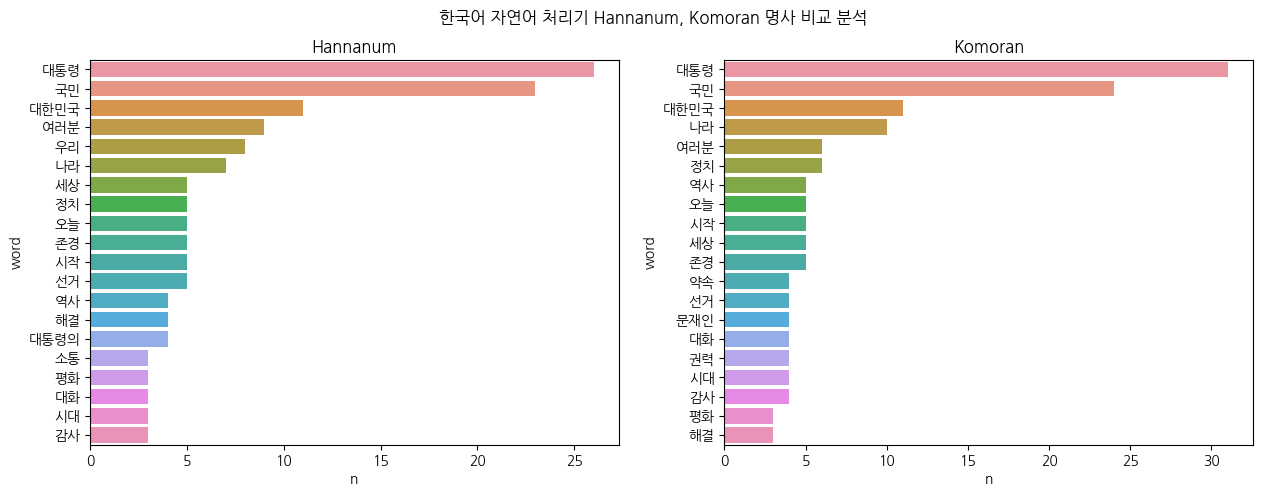

In [ ]:
# 단어 빈도 막대 그래프
# 믄재인 취임 연설문 빈도수 -> 국민 대한국 시작 존경 역사 평화 소통

fig, axes = plt.subplots(1, 2, figsize = (15,5)) # (컬럼의 갯수, 로우의 갯수)
plt.suptitle('한국어 자연어 처리기 Hannanum, Komoran 명사 비교 분석')

sns.barplot(data = h_top20, x = 'n', y = 'word', ax = axes[0])
axes[0].set_title('Hannanum')

sns.barplot(data = k_top20, x = 'n', y = 'word', ax = axes[1])
axes[1].set_title('Komoran')

plt.show()
# 데이터분석표 두개 포함

워드 클라우드

In [ ]:
# 한글폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

In [ ]:
# 단어와 빈도를 담는 딕셔너리 만들기 
k_dic_word = k_word_df.set_index('word').to_dict()['n'] # 데이터 프레임을 딕셔너리로 만들었음
k_dic_word

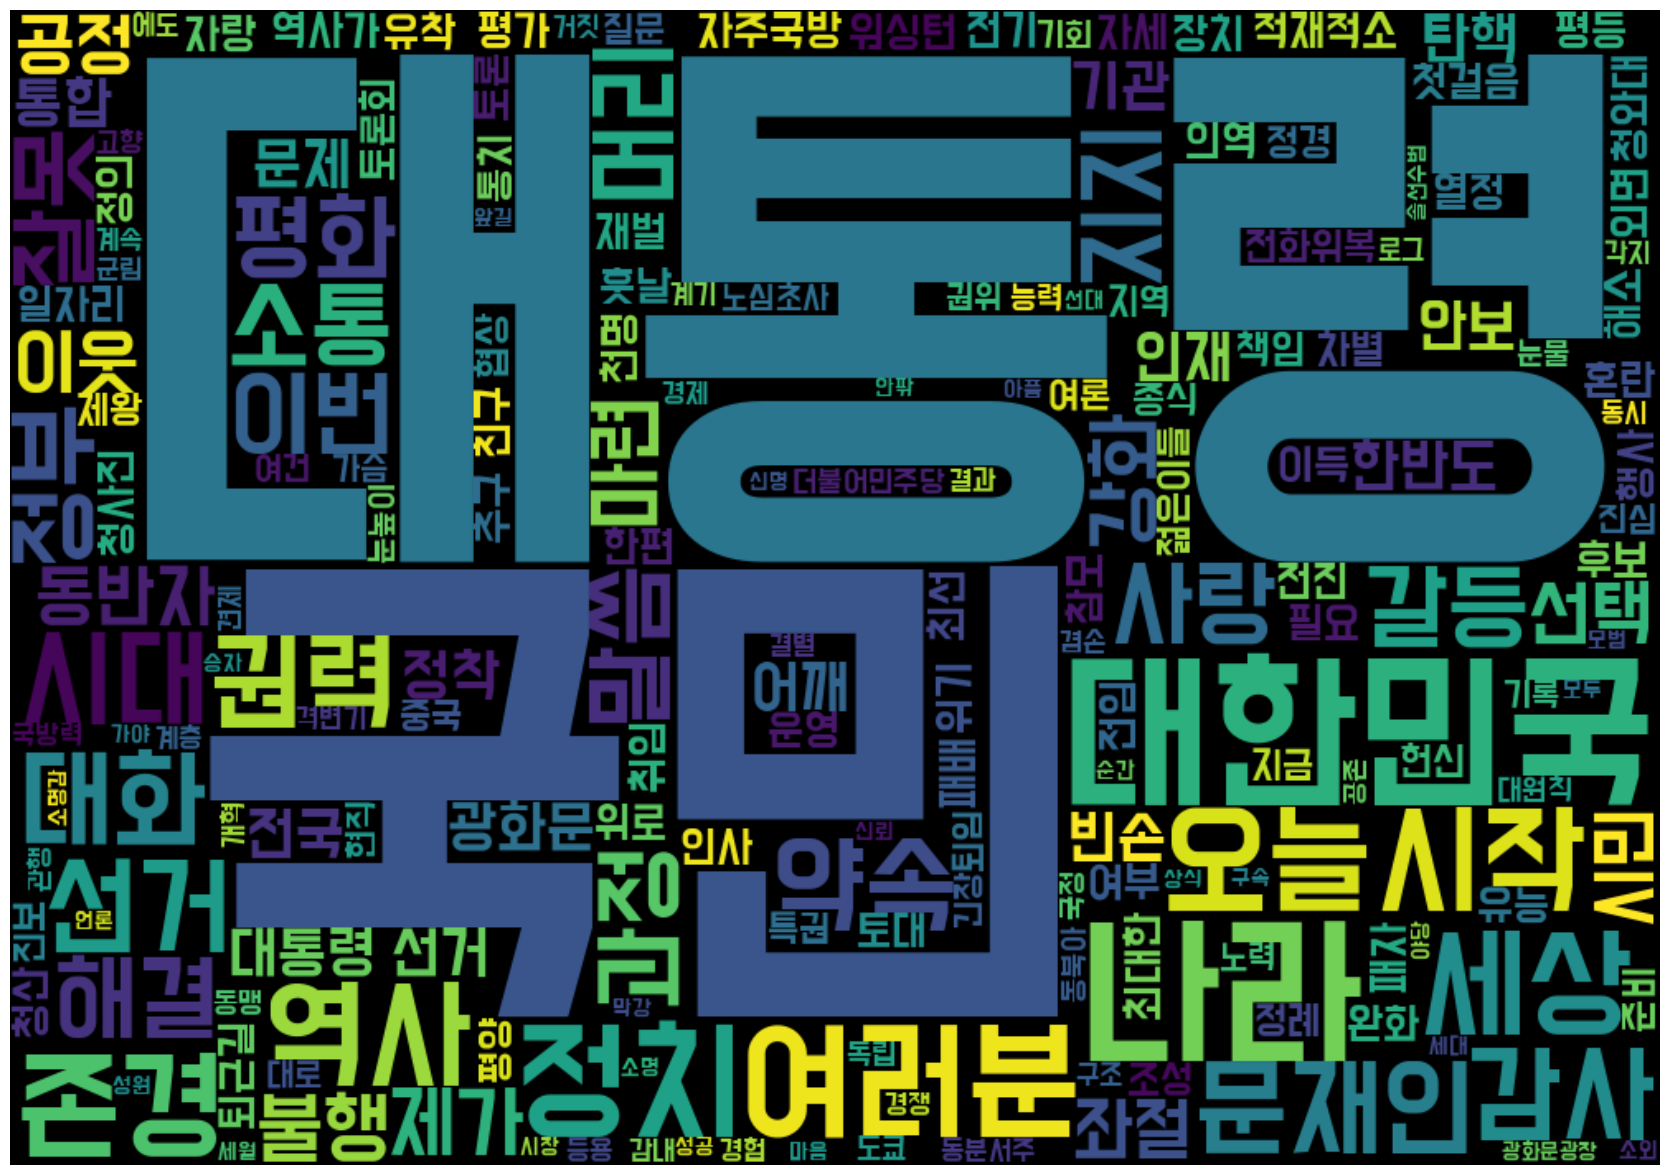

In [ ]:
from wordcloud import WordCloud

# 워드 클라우드 만들기 
wc = WordCloud(width = 1000, height = 700, font_path = font_path)
img_wordcloud = wc.generate_from_frequencies(k_dic_word)

plt.subplots(figsize = (25,15))
plt.axis('off')
plt.imshow(img_wordcloud, interpolation = 'bilinear')
plt.show()

mask를 활용한 워드클라우드

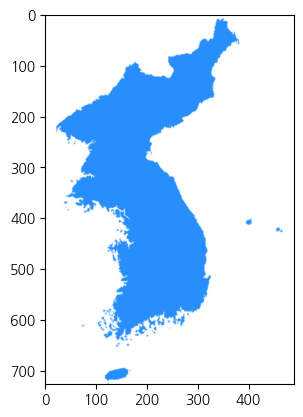

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

# 워드클라우드 Mask 설정을 위한 이미지 불러우기 
icon = Image.open('/content/korea_mask.jpg')
plt.imshow(icon)

In [ ]:
korea_mask = np.array(icon)
korea_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

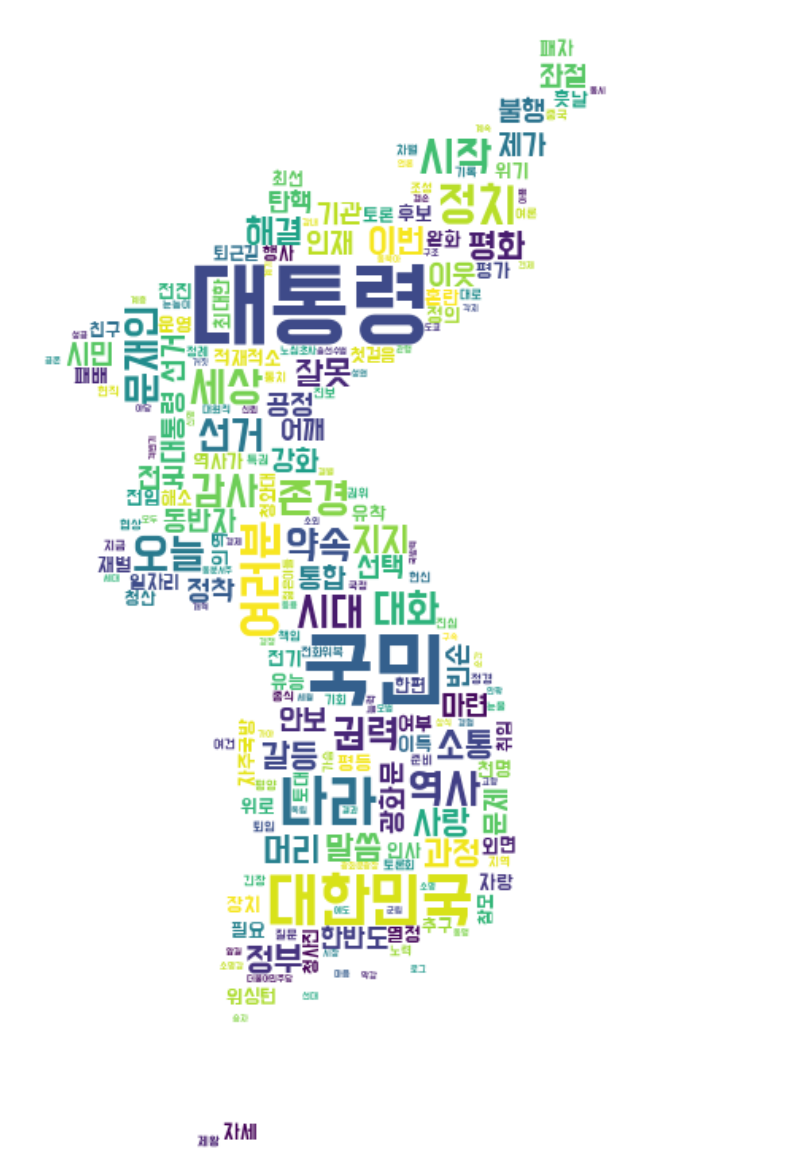

In [ ]:
wc = WordCloud(background_color = 'white', width = 1000, height = 700, font_path = font_path,
               mask = korea_mask)
img_wordcloud = wc.generate_from_frequencies(k_dic_word)

plt.subplots(figsize = (25,15))
plt.axis('off')
plt.imshow(img_wordcloud, interpolation = 'bilinear')
plt.show()

In [ ]:
# 워드클라우드 이미지 저장하기
img_wordcloud.to_file(filename = 'moon_wordcloud.png')

윤석열 대통령 취임식 연설문 텍스트 마이닝

In [ ]:
# 데이터 불러오기
yoon = open('/content/윤석열대통령_연설문.txt').read()
yoon

In [ ]:
# 데이터 전처리 -> 특수기호 삭제 -> 명사만 추출 -> 빈도표
# 특수기호 및 숫자 제거 -> 한글만 남기고 모두 삭제
yoon = re.sub('[^가-힣]', ' ', yoon)
yoon

In [ ]:
# 명사만 추출하여 데이터프레임 생성
# 명사를 추출할 자연어 처리기 2가지 (hannanum, komoran)
h_yoon_nn = hannanum.nouns(yoon)
k_yoon_nn = komoran.nouns(yoon)

# 데이터프레임으로 생성 
h_yword_df = pd.DataFrame({'word' : h_yoon_nn})
k_yword_df = pd.DataFrame({'word' : k_yoon_nn})

In [ ]:
# 단어의 글자수를 저장하는 컬럼 생성 -> 한글자 단어는 삭제
h_yword_df['count'] = h_yword_df['word'].str.len()
k_yword_df['count'] = k_yword_df['word'].str.len()

In [ ]:
# 한글자 단어를 삭제하고 글자수로 정렬
h_yword_df = h_yword_df.query('count >= 2')
h_yword_df.sort_values('count')

k_yword_df = k_yword_df.query('count >= 2')
k_yword_df.sort_values('count')

In [ ]:
# 명사의 빈도표(DataFrame) 생성
h_yword_df = h_yword_df.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)

k_yword_df = k_yword_df.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)


In [ ]:
h_yword_df

In [ ]:
k_yword_df

In [ ]:
# 단어 빈도 상위 20개 추출
h_ytop20 = h_yword_df.head(20)
k_ytop20 = k_yword_df.head(20)

In [ ]:
# 단어 빈도표(Dictionary) 생성
h_yword_dic = h_yword_df.set_index('word').to_dict()['n']
k_yword_dic = k_yword_df.set_index('word').to_dict()['n']

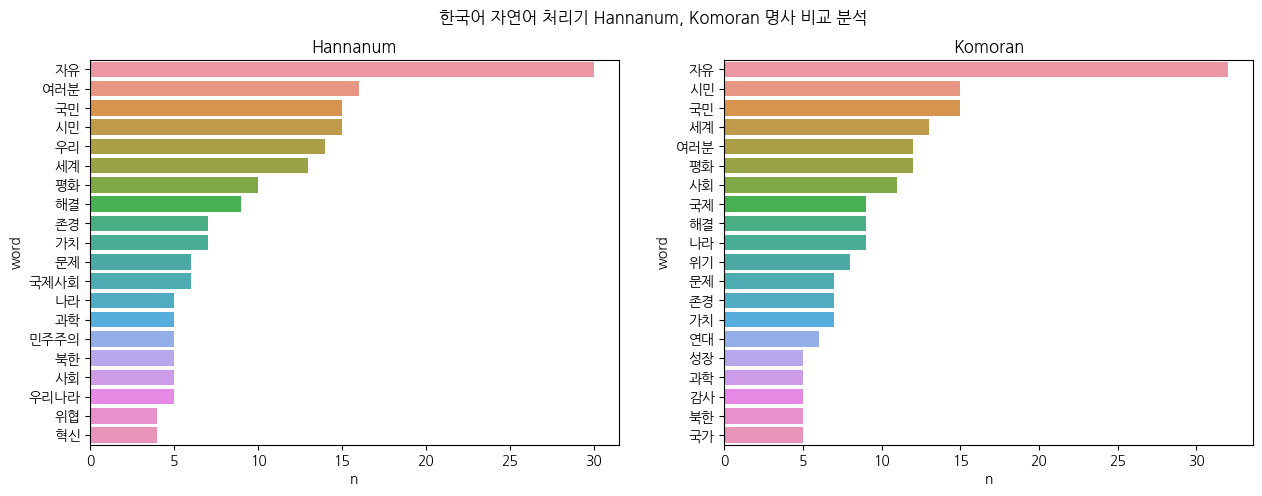

In [ ]:
# 단어 빈도 막대 그래프 그리기
# 윤석영 취임 연설문 -> 자유, 시민, 국민, 세계, 평화, 국제
# 정부 정책

fig, axes = plt.subplots(1, 2, figsize = (15,5)) # (컬럼의 갯수, 로우의 갯수)
plt.suptitle('한국어 자연어 처리기 Hannanum, Komoran 명사 비교 분석')

sns.barplot(data = h_ytop20, x = 'n', y = 'word', ax = axes[0])
axes[0].set_title('Hannanum')

sns.barplot(data = k_ytop20, x = 'n', y = 'word', ax = axes[1])
axes[1].set_title('Komoran')

plt.show()
# 데이터분석표 두개 포함

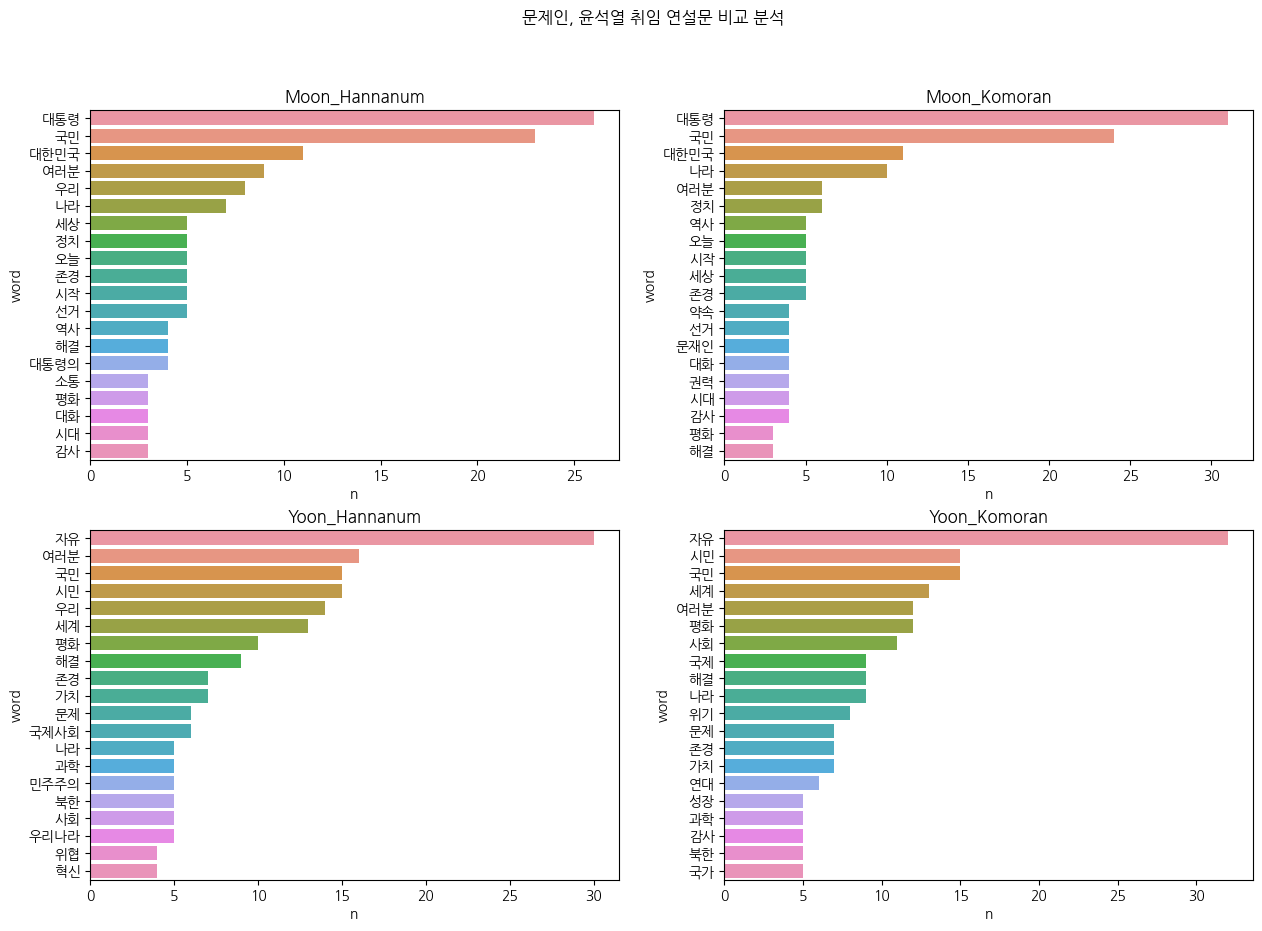

In [ ]:
# 문제인 정부 -> 국민, 대한민국, 우리나라, 역사, 평화, 해결, 소통
# 윤석열 정부 -> 자유, 시민, 국민, 정치, 국제, 세계, 위협, 혁신, 과학

fig, axes = plt.subplots(2, 2, figsize = (15,10)) # (컬럼의 갯수, 로우의 갯수)
plt.suptitle('문제인, 윤석열 취임 연설문 비교 분석')

sns.barplot(data = h_top20, x = 'n', y = 'word', ax = axes[0][0])
axes[0][0].set_title('Moon_Hannanum')

sns.barplot(data = k_top20, x = 'n', y = 'word', ax = axes[0][1])
axes[0][1].set_title('Moon_Komoran')


sns.barplot(data = h_ytop20, x = 'n', y = 'word', ax = axes[1][0])
axes[1][0].set_title('Yoon_Hannanum')

sns.barplot(data = k_ytop20, x = 'n', y = 'word', ax = axes[1][1])
axes[1][1].set_title('Yoon_Komoran')
plt.show()


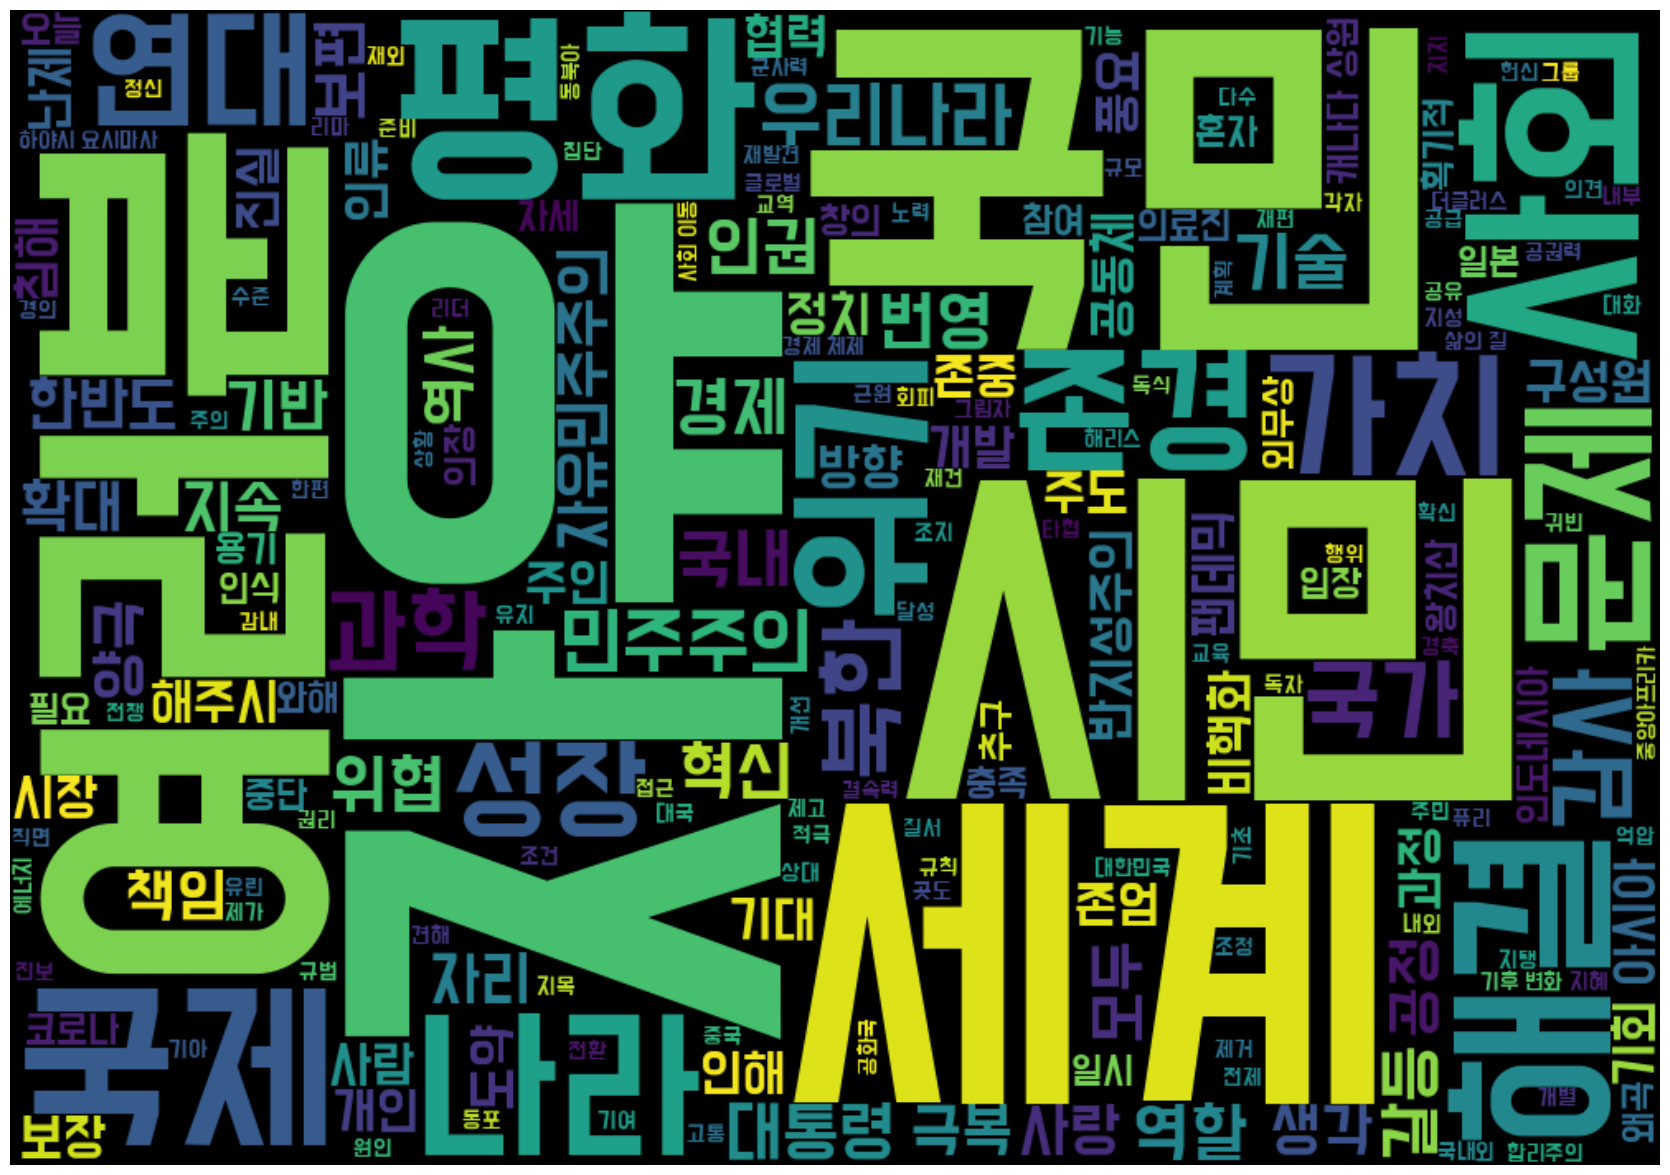

In [ ]:
# 워드 클라우드 만들기
wc = WordCloud(width = 1000, height = 700, font_path = font_path)
img_wordcloud = wc.generate_from_frequencies(k_yword_dic)

plt.subplots(figsize = (25,15))
plt.axis('off')
plt.imshow(img_wordcloud, interpolation = 'bilinear')
plt.show()

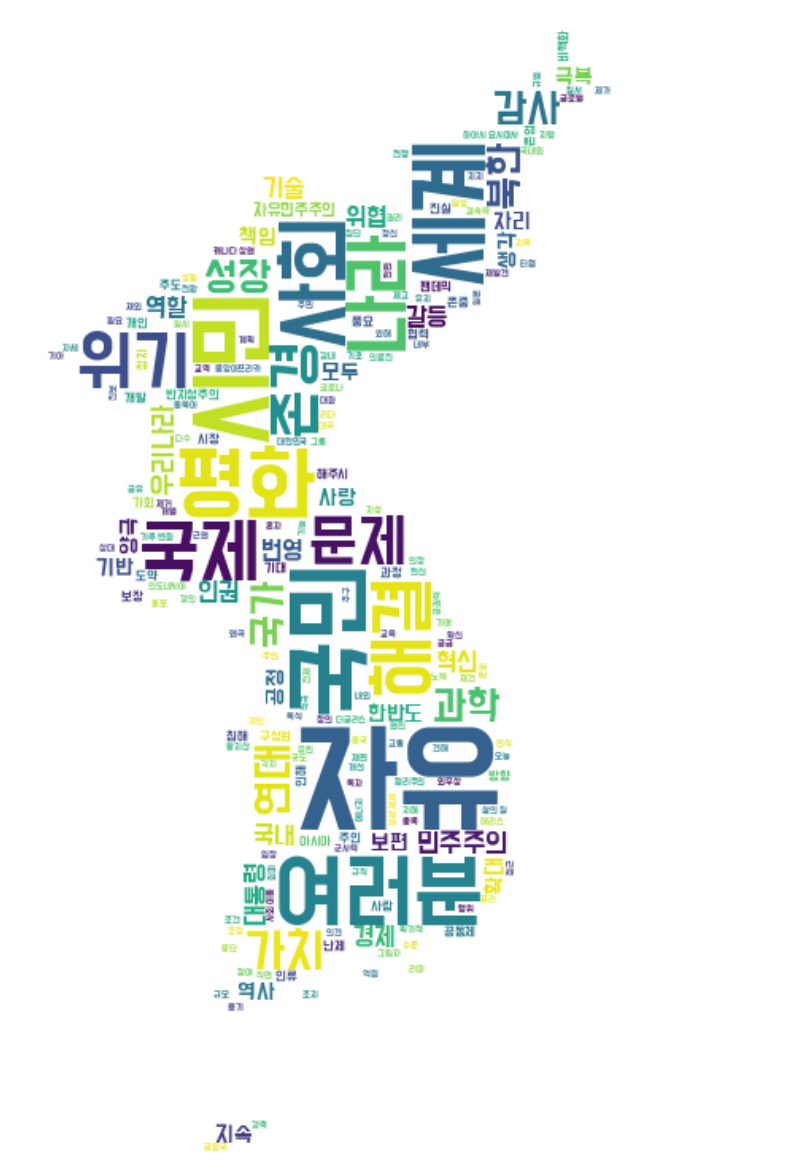

In [ ]:
wc = WordCloud(background_color = 'white', width = 1000, height = 700, font_path = font_path,
               mask = korea_mask)
img_wordcloud = wc.generate_from_frequencies(k_yword_dic)

plt.subplots(figsize = (25,15))
plt.axis('off')
plt.imshow(img_wordcloud, interpolation = 'bilinear')
plt.show()

In [ ]:
img_wordcloud.to_file(filename = 'yoon_wordcloud.png')